# Clasification

# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [1]:
import pandas as pd
import numpy as np

In [5]:
bankloan = pd.read_csv('../data/bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [7]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [8]:
X = bankloan[fitur]
y = bankloan[target]

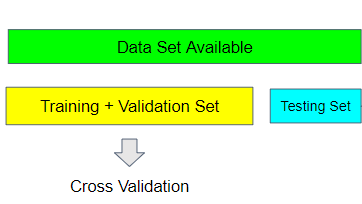

In [9]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

> ## Model Evaluation : Benchmark

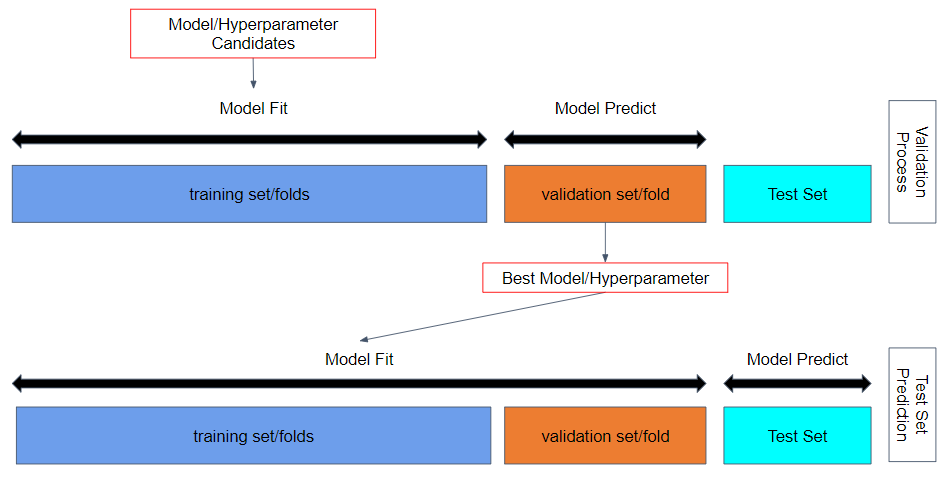

In [10]:
# model benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Accuracy

In [12]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [13]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)
print('CV DTC:', tree_cv)

CV Logreg: [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV KNN: [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV DTC: [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


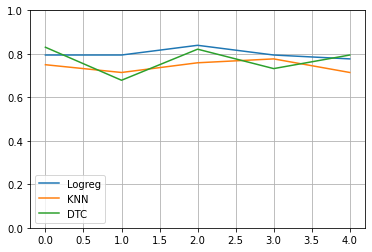

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.plot(range(len(tree_cv)), tree_cv, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [14]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())
print('CV DTC:', tree_cv.mean())

CV Logreg: 0.8
CV KNN: 0.7428571428571429
CV DTC: 0.7714285714285716


In [15]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())
print('CV DTC:', tree_cv.std())

CV Logreg: 0.020824828195876083
CV KNN: 0.024872121923543065
CV DTC: 0.057753434388557956


### Recall

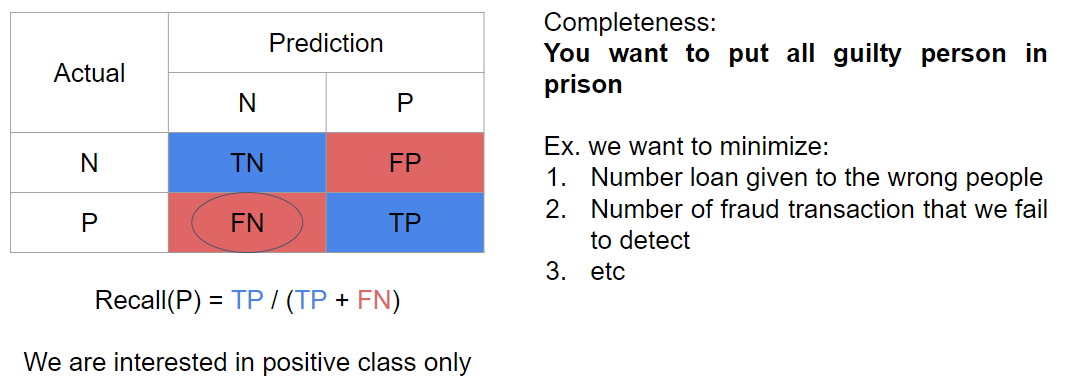

In [21]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='recall')
knn_cv_rc = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
tree_cv_rc = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [22]:
print('CV Logreg:', logreg_cv_rc)
print('CV KNN:', knn_cv_rc)
print('CV DTC:', tree_cv_rc)

CV Logreg: [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV KNN: [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV DTC: [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


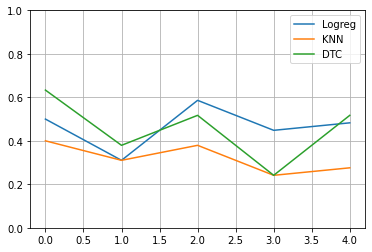

In [23]:
plt.plot(range(len(logreg_cv_rc)), logreg_cv_rc, label='Logreg')
plt.plot(range(len(knn_cv_rc)), knn_cv_rc, label='KNN')
plt.plot(range(len(tree_cv_rc)), tree_cv_rc, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [24]:
print('CV Logreg:', logreg_cv_rc.mean())
print('CV KNN:', knn_cv_rc.mean())
print('CV DTC:', tree_cv_rc.mean())

CV Logreg: 0.46551724137931033
CV KNN: 0.3213793103448276
CV DTC: 0.4577011494252874


In [25]:
print('CV Logreg:', logreg_cv_rc.std())
print('CV KNN:', knn_cv_rc.std())
print('CV DTC:', tree_cv_rc.std())

CV Logreg: 0.08992003317520893
CV KNN: 0.06021759987018779
CV DTC: 0.13481616986286768


### Flexible Metrics

In [26]:
skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'

def model_evaluation_cv(model, metric, fold):
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = fold, scoring = metric)
    return model_cv

In [27]:
def print_result(model_cv):
    print('CV Score:', model_cv)
    print('CV Score mean:', model_cv.mean())
    print('CV Score std:', model_cv.std())

In [28]:
model_cv = model_evaluation_cv(model, metric, skfold)
model_cv

array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])

In [29]:
print_result(model_cv)

CV Score: [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV Score mean: 0.543564482325905
CV Score std: 0.06927688261828344


### Cross Validate

In [33]:
from sklearn.model_selection import cross_validate
model_cv = cross_validate(model, X_train_val, y_train_val, cv = skfold, scoring = ['precision', 'recall', 'accuracy', 'f1'])
model_cv

{'fit_time': array([0.00997186, 0.00897503, 0.00997233, 0.0204618 , 0.01297617]),
 'score_time': array([0.01495838, 0.0149622 , 0.01296639, 0.01795173, 0.01694322]),
 'test_precision': array([0.65217391, 0.75      , 0.73913043, 0.65      , 0.58333333]),
 'test_recall': array([0.5       , 0.31034483, 0.5862069 , 0.44827586, 0.48275862]),
 'test_accuracy': array([0.79464286, 0.79464286, 0.83928571, 0.79464286, 0.77678571]),
 'test_f1': array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])}

In [43]:
cv_df = pd.DataFrame(model_cv, index=[f'fold_{x}' for x in range(1,6)])
cv_df

,fit_time,score_time,test_precision,test_recall,test_accuracy,test_f1
fold_1,0.009972,0.014958,0.652174,0.500000,0.794643,0.566038
fold_2,0.008975,0.014962,0.750000,0.310345,0.794643,0.439024
fold_3,0.009972,0.012966,0.739130,0.586207,0.839286,0.653846
fold_4,0.020462,0.017952,0.650000,0.448276,0.794643,0.530612
fold_5,0.012976,0.016943,0.583333,0.482759,0.776786,0.528302


In [46]:
cv_df['test_precision'].std()

0.06943791189606445

### Model Performance in Test Set

In [39]:
model

LogisticRegression(random_state=2020, solver='liblinear')

In [40]:
model.fit(X_train_val, y_train_val)

LogisticRegression(random_state=2020, solver='liblinear')

In [41]:
y_pred = model.predict(X_test)

In [42]:
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

recall: 0.4864864864864865
precision: 0.782608695652174
f1: 0.6000000000000001


In [44]:
cv_df.describe()

,fit_time,score_time,test_precision,test_recall,test_accuracy,test_f1
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.012471,0.015556,0.674928,0.465517,0.800000,0.543564
std,0.004712,0.001942,0.069438,0.100534,0.023283,0.077454
min,0.008975,0.012966,0.583333,0.310345,0.776786,0.439024
25%,0.009972,0.014958,0.650000,0.448276,0.794643,0.528302
50%,0.009972,0.014962,0.652174,0.482759,0.794643,0.530612
75%,0.012976,0.016943,0.739130,0.500000,0.794643,0.566038
max,0.020462,0.017952,0.750000,0.586207,0.839286,0.653846


In [56]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.95      0.89       103
    Positive       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [51]:
# precision(+)
precision_score(y_test, y_pred, pos_label=1)

0.782608695652174

In [52]:
# precision(-)
precision_score(y_test, y_pred, pos_label=0)

0.8376068376068376

In [54]:
f1_score(y_test, y_pred, pos_label=0)

0.8909090909090909

In [48]:
# macro
(0.84+0.78)/2

0.81

In [50]:
# weighted
(((103/140)*0.84)+((37/140)*0.78))

0.8241428571428572

In [106]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

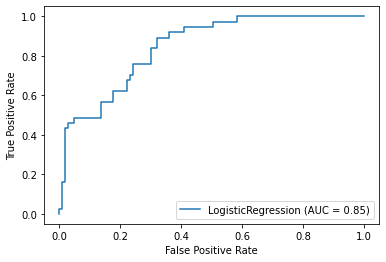

In [58]:
plot_roc_curve(model, X_test, y_test)
plt.show()

In [65]:
y_prob1 = model.predict_proba(X_test)[:,1]
y_prob1
roc_auc_score(y_test, y_prob1)

0.8475465757019154

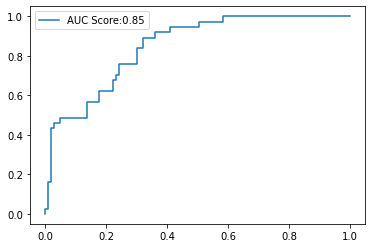

In [74]:
fpr, tpr, thr = roc_curve(y_test, y_prob1)
plt.plot(fpr, tpr)
plt.legend([f'AUC Score:{round(roc_auc_score(y_test, y_prob1),2)}'])

In [96]:
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thr': thr})
roc_df[roc_df['tpr']>0.8].sort_values('fpr')

,fpr,tpr,thr
21,0.300971,0.837838,0.269020
22,0.320388,0.837838,0.260175
23,0.320388,0.891892,0.254902
24,0.359223,0.891892,0.226951
25,0.359223,0.918919,0.219228
26,0.407767,0.918919,0.188749
27,0.407767,0.945946,0.181573
28,0.504854,0.945946,0.143030
29,0.504854,0.972973,0.135471
30,0.582524,0.972973,0.105802


In [85]:
len(y_prob1)
y_test
# len(y_pred)

,default
118,1
309,0
339,1
686,0
639,0
...,...
597,1
58,0
467,0
148,0


In [98]:
new_thr = 0.254902
y_pred = model.predict(X_test) # threshold 0.5
y_pred025 = [1 if i > new_thr else 0 for i in model.predict_proba(X_test)[:,1]] # threshold 0.254902
prob_df = pd.DataFrame({'prob_1': y_prob1, 'y_pred_nt': y_pred025, 'y_pred': y_pred})
prob_df.head()

,prob_1,y_pred_nt,y_pred
0,0.591712,1,1
1,0.314290,1,0
2,0.310958,1,0
3,0.409367,1,0
4,0.240005,0,0


In [101]:
np.where(model.predict_proba(X_test)[:,1]>new_thr,1,0)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0])

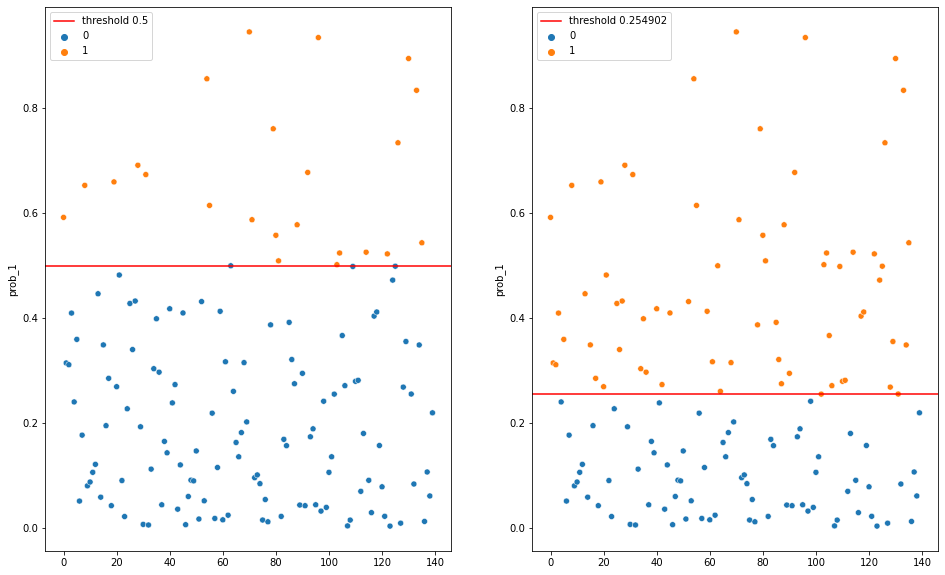

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       103
           1       0.50      0.89      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.79      0.72       140
weighted avg       0.83      0.74      0.75       140



In [102]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred'])
plt.axhline(0.5, color='red', label='threshold 0.5')
plt.legend()

plt.subplot(122)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred_nt'])
plt.axhline(new_thr, color='red', label=f'threshold {new_thr}')
plt.legend()

plt.show()

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred025))

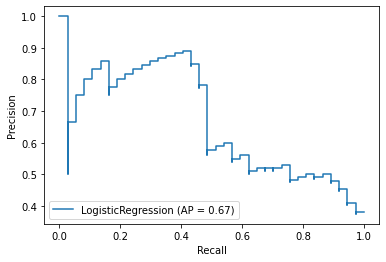

In [103]:
plot_precision_recall_curve(model, X_test, y_test)
plt.show()

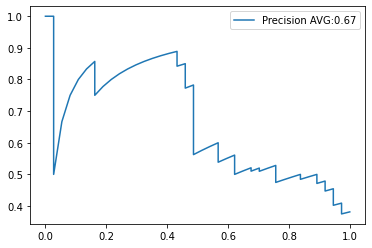

In [107]:
pr, rc, thr = precision_recall_curve(y_test, y_prob1)
plt.plot(rc, pr)
plt.legend([f'Precision AVG:{round(average_precision_score(y_test, y_prob1),2)}'])

In [114]:
pr_df = pd.DataFrame({'precision': pr[:-1], 'recall': rc[:-1], 'thresholds': thr})
pr_df[pr_df['recall']>0.8].sort_values('precision', ascending=False)

,precision,recall,thresholds
35,0.500000,0.837838,0.269020
31,0.500000,0.891892,0.254902
30,0.492537,0.891892,0.241334
32,0.492308,0.864865,0.255088
34,0.492063,0.837838,0.268279
36,0.491803,0.810811,0.271023
29,0.485294,0.891892,0.240005
33,0.484375,0.837838,0.260175
26,0.478873,0.918919,0.219228
28,0.478261,0.891892,0.238153


## Hyperparameter Tuning Grid Search

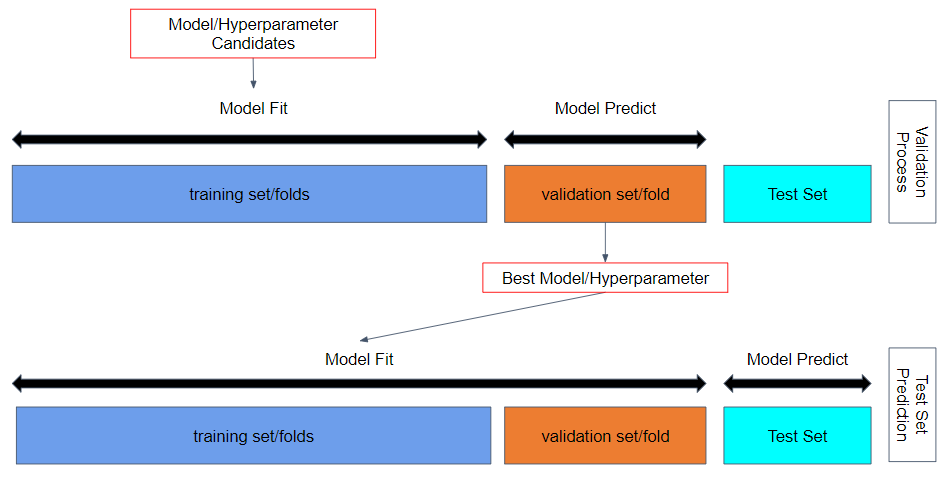

In [116]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [117]:
logreg_bench = LogisticRegression()

hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6 15 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [120]:
skfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    logreg_bench,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [121]:
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   11.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='recall', verbose=1)

In [124]:
print('best recall score:', grid_search.best_score_)
print('best param:', grid_search.best_params_)

best recall score: 0.4724137931034482
best param: {'C': 1000, 'max_iter': 100}


In [126]:
pd.DataFrame(grid_search.cv_results_).sort_values('std_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,0.041688,0.009062,0.009575,0.002863,0.0001,1000,"{'C': 0.0001, 'max_iter': 1000}",0.000000,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
84,0.044881,0.010870,0.009175,0.003645,0.0001,100,"{'C': 0.0001, 'max_iter': 100}",0.000000,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
85,0.037901,0.008876,0.012565,0.003547,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.000000,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
88,0.034707,0.006128,0.009175,0.002475,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.000000,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
87,0.036104,0.001828,0.008777,0.001717,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.000000,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.037302,0.009765,0.008176,0.002034,0.001,500,"{'C': 0.001, 'max_iter': 500}",0.333333,0.275862,0.241379,0.103448,0.413793,0.273563,0.103167,73
74,0.035106,0.014785,0.008377,0.002570,0.001,300,"{'C': 0.001, 'max_iter': 300}",0.333333,0.275862,0.241379,0.103448,0.413793,0.273563,0.103167,73
73,0.036103,0.008611,0.008577,0.002862,0.001,200,"{'C': 0.001, 'max_iter': 200}",0.333333,0.275862,0.241379,0.103448,0.413793,0.273563,0.103167,73
72,0.041888,0.018722,0.007181,0.001162,0.001,100,"{'C': 0.001, 'max_iter': 100}",0.333333,0.275862,0.241379,0.103448,0.413793,0.273563,0.103167,73


In [128]:
logreg_bench.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [127]:
print('best estimator:', grid_search.best_estimator_)

best estimator: LogisticRegression(C=1000)


> ## Final Result Comparison : Hyperparameter Tuning Grid Search

In [132]:
# model benchmark
logreg_bench.fit(X_train_val, y_train_val)
y_pred_bench = logreg_bench.predict(X_test)
print(classification_report(y_test, y_pred_bench))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



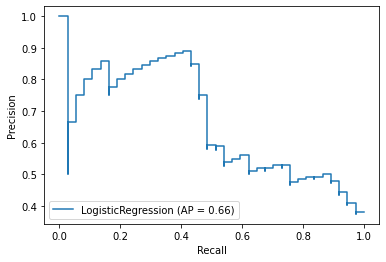

In [131]:
plot_precision_recall_curve(logreg_bench, X_test, y_test)

In [137]:
type(logreg_bench)

sklearn.linear_model._logistic.LogisticRegression

In [138]:
# model tuned
logreg_tuned = grid_search.best_estimator_
logreg_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = logreg_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



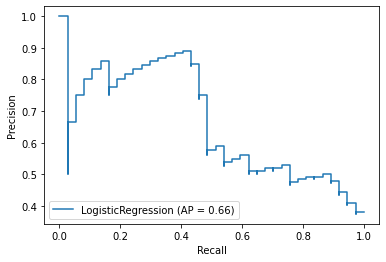

In [139]:
plot_precision_recall_curve(logreg_tuned, X_test, y_test)

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)

In [146]:
random_search = RandomizedSearchCV(
    logreg_bench,
    param_distributions = hyperparam_space,
    n_iter=180,
    cv = StratifiedKFold(n_splits=5),
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [147]:
random_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    7.2s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=180, n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                              0.0005, 0.0001],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     1000]},
                   scoring='recall', verbose=1)

In [150]:
i = 2
display(pd.DataFrame(random_search.cv_results_).head(i))
display(pd.DataFrame(grid_search.cv_results_).head(i))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052276,0.030267,0.016752,0.008541,100,1000,"{'max_iter': 100, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.07833,1
1,0.064171,0.021975,0.017366,0.008061,200,1000,"{'max_iter': 200, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.07833,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058746,0.023531,0.009382,0.002175,1000,100,"{'C': 1000, 'max_iter': 100}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.07833,1
1,0.089579,0.031933,0.014263,0.006791,1000,200,"{'C': 1000, 'max_iter': 200}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.07833,1


## Algorithm Chains: Adult Dataset

> ## Data

In [151]:
!pip install category_encoders

In [152]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [153]:
adult = pd.read_csv('../data/adult.csv')
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [154]:
adult.replace('?', np.nan, inplace=True)

In [156]:
adult.isnull().sum()/len(adult)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [157]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [161]:
adult[['workclass', 'occupation', 'native.country', 'marital.status']].describe()

,workclass,occupation,native.country,marital.status
count,30725,30718,31978,32561
unique,8,14,41,7
top,Private,Prof-specialty,United-States,Married-civ-spouse
freq,22696,4140,29170,14976


> ## Preprocessing

- Workclass:
    - Imputation: most-frequent / Private
    - Binary Encoding
- Occupation:
    - Imputation: most-frequent / Prof-specialty
    - Binary Encoding
- Native Country:
    - Imputation: most-frequent / United-States
    - Binary Encoding
- Marital, Relationship, Race, Sex:
    - One Hot Encoding

In [162]:
workclass_pipeline = Pipeline([
    ('imputer_wc', SimpleImputer(strategy='most_frequent')),
    ('binary_wc', ce.BinaryEncoder())
])

occupation_pipeline = Pipeline([
    ('imputer_oc', SimpleImputer(strategy='most_frequent')),
    ('binary_oc', ce.BinaryEncoder())
])

native_pipeline = Pipeline([
    ('imputer_nc', SimpleImputer(strategy='constant', fill_value='United-States')),
    ('binary_nc', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('workclass_transform', workclass_pipeline, ['workclass']),
    ('occupation_transform', occupation_pipeline, ['occupation']),
    ('native_transform', native_pipeline, ['native.country']),
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['marital.status', 'relationship', 'race', 'sex'])
], remainder = 'passthrough')

> ## Data Splitting

In [163]:
X = adult.drop(columns=['fnlwgt', 'income', 'education'])
y = np.where(adult['income']=='>50K',1,0)

In [164]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    random_state = 2020
)

In [165]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', tree)
])

In [166]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring='f1')

In [168]:
print('CV Score:', model_cv)
print('CV Score Mean:', model_cv.mean())
print('CV Score Std:', model_cv.std())

CV Score: [0.58780992 0.63417085 0.60612351 0.64115308 0.62022704]
CV Score Mean: 0.6178968798729898
CV Score Std: 0.019261154653167665


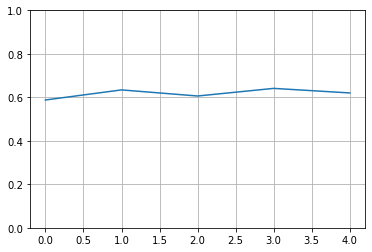

In [170]:
plt.plot(range(len(model_cv)), model_cv)
plt.grid()
plt.ylim(0,1)
plt.show()

In [172]:
logreg = LogisticRegression(random_state=2020)

logreg_pipeline = Pipeline([
    ('preprocess', transformer),
    ('clf', logreg)
])

logreg_cv = cross_val_score(logreg_pipeline, X_train_val, y_train_val, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished


In [174]:
print('CV Score:', logreg_cv)
print('CV Score Mean:', logreg_cv.mean())
print('CV Score Std:', logreg_cv.std())

CV Score: [0.56315527 0.59215686 0.60575968 0.61708253 0.61635833]
CV Score Mean: 0.5989025341754429
CV Score Std: 0.02002802379400768


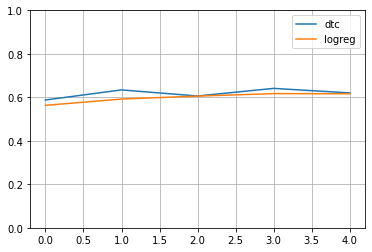

In [175]:
plt.plot(range(len(model_cv)), model_cv, label='dtc')
plt.plot(range(len(logreg_cv)), logreg_cv, label='logreg')
plt.grid()
plt.legend()
plt.ylim(0,1)
plt.show()

## Hyperparameter Tuning

In [180]:
type(estimator)

sklearn.pipeline.Pipeline

In [179]:
# estimator (DTC)
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('workclass_transform',
                                    Pipeline(steps=[('imputer_wc',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('binary_wc',
                                                     BinaryEncoder())]),
                                    ['workclass']),
                                   ('occupation_transform',
                                    Pipeline(steps=[('imputer_oc',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('binary_oc',
                                                     BinaryEncoder())]),
                                    ['occupation']),
                                   ('native_transform',
                             

In [183]:
hyperparam_space = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5,10,15,20],
    'clf__min_samples_split': [5,6,7,8]
}

grid_search_dtc = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

In [184]:
grid_search_dtc.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('workclass_transform',
                                                                         Pipeline(steps=[('imputer_wc',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('binary_wc',
                                                                                          BinaryEncoder())]),
                                                                         ['workclass']),
                                                                        ('occupation_transform',
                                                     

In [187]:
print('estimator dtc tuned score:', grid_search_dtc.best_score_)
print('estimator dtc best params:', grid_search_dtc.best_params_)

estimator dtc tuned score: 0.6755073403632493
estimator dtc best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 5}


In [189]:
pd.DataFrame(grid_search_dtc.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,1.199756,0.035923,0.103179,0.014113,entropy,10,5,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.660394,0.683947,0.650173,0.694869,0.688153,0.675507,0.017183,1
22,1.605922,0.101528,0.137705,0.016192,entropy,10,7,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.660099,0.684882,0.649184,0.694595,0.688153,0.675382,0.017564,2
21,1.409705,0.087364,0.141701,0.020870,entropy,10,6,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.660394,0.684282,0.648836,0.694908,0.688465,0.675377,0.017669,3
23,1.277375,0.119379,0.121743,0.018814,entropy,10,8,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.660394,0.683683,0.648221,0.695221,0.687557,0.675015,0.017733,4
4,1.750356,0.028488,0.176936,0.045775,gini,10,5,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.635442,0.683213,0.645700,0.695029,0.685491,0.668975,0.023751,5
6,1.255353,0.008647,0.110585,0.012626,gini,10,7,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.634123,0.682310,0.644018,0.694170,0.686851,0.668295,0.024362,6
5,1.576501,0.245627,0.116843,0.024641,gini,10,6,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.634429,0.682003,0.645700,0.692411,0.686062,0.668121,0.023420,7
7,1.279766,0.028036,0.119387,0.012362,gini,10,8,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.634476,0.680217,0.645352,0.692411,0.684302,0.667352,0.023003,8
9,1.677932,0.138748,0.126072,0.019180,gini,15,6,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.646528,0.673816,0.653740,0.675856,0.672291,0.664446,0.011960,9
11,1.341903,0.053729,0.132766,0.011267,gini,15,8,"{'clf__criterion': 'gini', 'clf__max_depth': 1...",0.644725,0.670251,0.651790,0.679715,0.674656,0.664227,0.013564,10


## Result Comparison

In [192]:
estimator.fit(X_train_val, y_train_val)
y_pred_bench = estimator.predict(X_test)

print(classification_report(y_test, y_pred_bench))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6181
           1       0.79      0.51      0.62      1960

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [193]:
estimator_tuned = grid_search_dtc.best_estimator_
estimator_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6181
           1       0.71      0.66      0.69      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.85      0.85      8141



In [195]:
precision, recall, thr = precision_recall_curve(y_test, estimator_tuned.predict_proba(X_test)[:,1])
pr_df = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thr': thr})
pr_df

,precision,recall,thr
0,0.240757,1.000000,0.000000
1,0.317822,0.982653,0.003497
2,0.333160,0.981633,0.004219
3,0.337430,0.980612,0.004630
4,0.341268,0.980102,0.007143
...,...,...,...
79,0.922591,0.297959,0.800000
80,0.926868,0.297449,0.846154
81,0.939024,0.275000,0.888889
82,0.946996,0.273469,0.906977


In [201]:
pr_df[pr_df['precision']<=0.8].sort_values('recall', ascending=True).head(20)

,precision,recall,thr
69,0.784661,0.542857,0.571918
68,0.780772,0.546939,0.571429
67,0.778825,0.547959,0.562500
66,0.778339,0.550000,0.560000
65,0.776420,0.551020,0.538462
64,0.776824,0.554082,0.535714
63,0.714128,0.660204,0.517992
62,0.713268,0.663776,0.500000
61,0.710005,0.677041,0.472441
60,0.709246,0.677041,0.444444


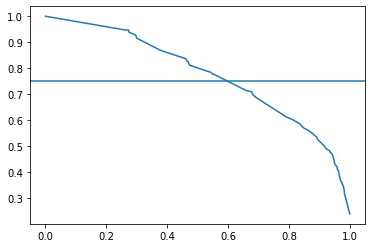

In [197]:
plt.plot(recall, precision)
plt.axhline(0.75)

In [202]:
new_thr = 0.411765
y_pred041 = np.where(estimator_tuned.predict_proba(X_test)[:,1]> new_thr,1,0)

In [203]:
print(classification_report(y_test, y_pred041))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6181
           1       0.71      0.68      0.69      1960

    accuracy                           0.86      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.86      0.85      8141



In [204]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6181
           1       0.71      0.66      0.69      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.85      0.85      8141



# Regression